In [12]:
# Criar a pasta .kaggle (se não existir)
!mkdir -p ~/.kaggle

# Enviar o arquivo 'kaggle.json' para o Colab (vai abrir uma janela para upload)
from google.colab import files
files.upload()  # Envie o arquivo 'kaggle.json' aqui

# Mover o arquivo para a pasta correta
!mv kaggle.json ~/.kaggle/

# Ajustar permissões para evitar erros de acesso
!chmod 600 ~/.kaggle/kaggle.json

# Baixar o dataset do Furniture Image Dataset
!kaggle datasets download -d udaysankarmukherjee/furniture-image-dataset

# Criar uma pasta para extrair os arquivos
!mkdir furniture_dataset

# Descompactar o dataset
!unzip furniture-image-dataset.zip -d furniture_dataset


A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: furniture_dataset/table dataset/image_19.jpeg  
  inflating: furniture_dataset/table dataset/image_190.jpeg  
  inflating: furniture_dataset/table dataset/image_1900.jpeg  
  inflating: furniture_dataset/table dataset/image_1901.jpeg  
  inflating: furniture_dataset/table dataset/image_1902.jpeg  
  inflating: furniture_dataset/table dataset/image_1903.jpeg  
  inflating: furniture_dataset/table dataset/image_1904.jpeg  
  inflating: furniture_dataset/table dataset/image_1905.jpeg  
  inflating: furniture_dataset/table dataset/image_1906.jpeg  
  inflating: furniture_dataset/table dataset/image_1907.jpeg  
  inflating: furniture_dataset/table dataset/image_1908.jpeg  
  inflating: furniture_dataset/table dataset/image_1909.jpeg  
  inflating: furniture_dataset/table dataset/image_191.jpeg  
  inflating: furniture_dataset/table dataset/image_1910.jpeg  
  inflating: furniture_dataset/table dataset/image_1911.jpeg  


In [29]:
import shutil

# Remover a pasta da classe indesejada
shutil.rmtree("/content/furniture_dataset/almirah_dataset", ignore_errors=True)

##Pré-processamento

In [30]:

import tensorflow as tf
import keras
from tensorflow.keras import layers, models, optimizers, utils
dictory = "/content/furniture_dataset"
train_dataset , val_dataset = keras.preprocessing.image_dataset_from_directory(
  dictory,
  validation_split=0.2,
  subset="both",
  seed = 1,
  image_size=(160, 160))


Found 12000 files belonging to 4 classes.
Using 9600 files for training.
Using 2400 files for validation.


In [31]:
print(train_dataset)
print(val_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [32]:
from tensorflow.keras.applications import MobileNetV2
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(160, 160, 3),
                                                     include_top=False,
                                                     weights='imagenet')

In [33]:
pretrained_model.trainable = False

In [34]:
inputs = keras.Input(shape=(160, 160, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = pretrained_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs, outputs)

In [35]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="accuracy")]
)
model.fit(train_dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


300/300 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.7194 - loss: 0.7294 - val_accuracy: 0.9392 - val_loss: 0.2146
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9559 - loss: 0.1825 - val_accuracy: 0.9825 - val_loss: 0.1089
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9919 - loss: 0.0945 - val_accuracy: 0.9983 - val_loss: 0.0615
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 1.0000 - loss: 0.0556 - val_accuracy: 1.0000 - val_loss: 0.0402
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 1.0000 - loss: 0.0368 - val_accuracy: 1.0000 - val_loss: 0.0279
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 1.0000 - loss: 0.0263 - val_accuracy: 1.0000 - val_loss: 0.0200
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 1.0000 - loss: 0.0191 - val_accuracy: 1.0000 - val_loss: 0.0153
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 1.0000 - loss: 0.0145 - val_accuracy: 1.

In [36]:
loss, accuracy = model.evaluate(val_dataset)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 0.0013
Loss: 0.0013
Accuracy: 1.0000


In [37]:
import numpy as np
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Adicionar dimensão do batch
    img_array = img_array / 255.0  # Normalizar

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    class_names = train_dataset.class_names  # Pegar os nomes das classes do dataset

    # Exibir resultados formatados
    print("\nProbabilidades por classe:")
    for class_name, prob in zip(class_names, prediction[0]):
        print(f" → {class_name}: {prob:.2%}")

    print(f"\nClasse predita: {class_names[predicted_class]} ({prediction[0][predicted_class]:.2%} de confiança)\n")

    return class_names[predicted_class], prediction

# Exemplo de predição
image_path = "/content/cadeira2.jpg"
predict_image(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

Probabilidades por classe:
 → chair_dataset: 51.11%
 → fridge dataset: 0.00%
 → table dataset: 48.85%
 → tv dataset: 0.03%

Classe predita: chair_dataset (51.11% de confiança)



('chair_dataset',
 array([[5.1113665e-01, 1.0017508e-06, 4.8852012e-01, 3.4224801e-04]],
       dtype=float32))

In [38]:
def extract_features(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Adicionar dimensão do batch
    img_array = img_array / 255.0  # Normalizar

    # Extrair os recursos da penúltima camada do modelo
    features = feature_extractor.predict(img_array)
    return features.flatten()  # Transformar em vetor 1D

# Criar o modelo para extração de características (penúltima camada)
feature_extractor = keras.Model(inputs=model.input, outputs=model.layers[-2].output)

# Exemplo de extração de características para comparação
vector1 = extract_features("/content/cadeira.jpg")
vector2 = extract_features("/content/cadeira2.jpg")

print("Vetor de características da primeira imagem:", vector1)
print("Vetor de características da segunda imagem:", vector2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Vetor de características da primeira imagem: [0. 0. 0. ... 0. 0. 0.]
Vetor de características da segunda imagem: [0.2883873  0.00086077 0.1625078  ... 0.         0.49280158 0.        ]


In [39]:
from scipy.spatial.distance import cosine
similarity = 1 - cosine(vector1, vector2)
print(f"Similaridade: {similarity:.4f}")

Similaridade: 0.7389


In [40]:
import requests
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics.pairwise import cosine_similarity
from bs4 import BeautifulSoup
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

# Função para buscar imagens na internet
def search_images(query, num_images=10):
    search_url = f"https://www.google.com/search?tbm=isch&q={query}"
    headers = {"User-Agent": "Mozilla/5.0"}

    response = requests.get(search_url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    image_urls = []
    for img in soup.find_all("img"):
        url = img.get("src")
        if url and url.startswith("http"):
            image_urls.append(url)
        if len(image_urls) >= num_images:
            break

    return image_urls


In [41]:
# Função para baixar e processar imagens
def download_and_process_image(image_url):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    img = img.resize((160, 160))
    img_array = np.array(img) / 255.0
    return np.expand_dims(img_array, axis=0), img  # Retorna também a imagem original para exibir

# Função para calcular similaridade
def calculate_similarity(vector1, vector2):
    return cosine_similarity([vector1], [vector2])[0][0] * 100  # Converte para percentual


In [42]:
# Função principal: mineração de imagens similares /content/furniture_dataset/fridge dataset
def find_similar_images(image_path):
    pred_class, _ = predict_image(image_path)  # Obtém a classe predita
    query = pred_class.replace(" dataset" , "")  # Formata a busca
    print(f"\nBuscando imagens relacionadas a: {query}...")

    ref_vector = extract_features(image_path)  # Extrai características da imagem base
    image_urls = search_images(query, num_images=10)  # Busca imagens na internet

    similar_images = []

    for url in image_urls:
        try:
            img_array, img = download_and_process_image(url)  # Baixa e processa a imagem
            img_vector = feature_extractor.predict(img_array).flatten()  # Extrai características

            similarity = calculate_similarity(ref_vector, img_vector)  # Calcula similaridade

            if similarity >= 50:
                similar_images.append((url, similarity, img))  # Adiciona a imagem e a similaridade

                # Exibe a imagem com a maior similaridade
                print(f"Imagem com {similarity:.2f}% de similaridade: {url}")
                plt.figure(figsize=(6, 6))
                plt.imshow(img)
                plt.axis('off')  # Para não mostrar os eixos
                plt.show()

        except Exception as e:
            print(f"Erro ao processar imagem: {e}")

    return similar_images


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Probabilidades por classe:
 → chair_dataset: 82.45%
 → fridge dataset: 0.00%
 → table dataset: 17.54%
 → tv dataset: 0.01%

Classe predita: chair_dataset (82.45% de confiança)


Buscando imagens relacionadas a: chair_dataset...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Imagem com 57.40% de similaridade: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTw75gvH-lc6gT7mOmxuif_N3J0JkSLcyKX89qPnEXzyFIb4s4J7EbqO2Hw5g&s


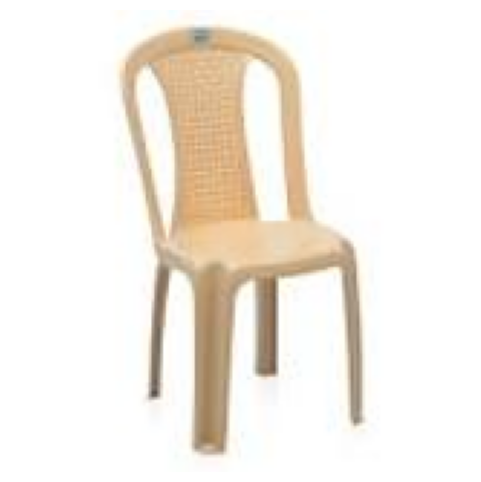

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


[('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTw75gvH-lc6gT7mOmxuif_N3J0JkSLcyKX89qPnEXzyFIb4s4J7EbqO2Hw5g&s',
  57.40417242050171,
  <PIL.Image.Image image mode=RGB size=160x160>)]

In [43]:
image_path = "/content/cadeira.jpg"
find_similar_images(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Probabilidades por classe:
 → chair_dataset: 0.43%
 → fridge dataset: 0.02%
 → table dataset: 5.99%
 → tv dataset: 93.55%

Classe predita: tv dataset (93.55% de confiança)


Buscando imagens relacionadas a: tv...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Imagem com 60.09% de similaridade: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQGnzz_Mh87gpX1Xzyz3DfYHRNF_xq4C2Y8xn13u9QfgjXT6KV8NvkeQOViVdI&s


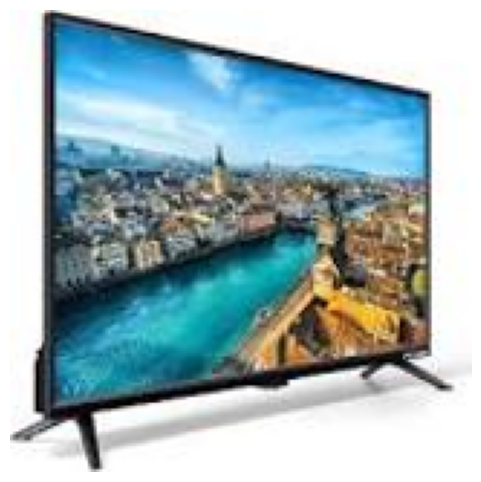

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Imagem com 61.74% de similaridade: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRcaKWUmXFLv4YWPeu3QV-JhHUQGIHkjvj39gyHWdWdbZHPV-rnBx1uw6h4yQ&s


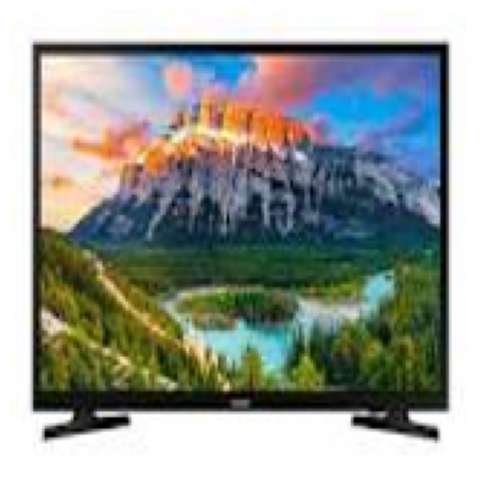

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Imagem com 61.63% de similaridade: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQQZ917RfvpWyQzzwKpWrIM1ZrgXdf2CqBqFgrnnkaKesjkE90jBJ8y4prNig&s


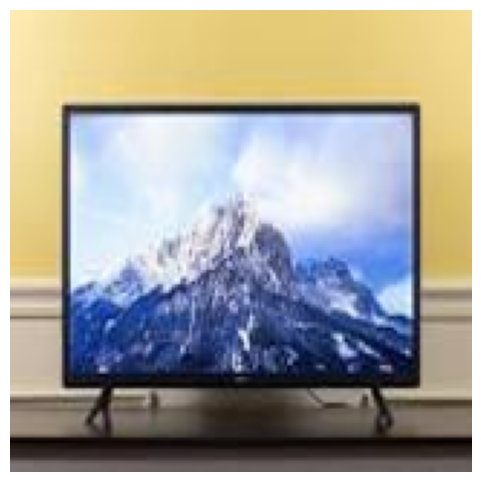

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Imagem com 51.50% de similaridade: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ9rIQq5SftsxSblulLi8lL8U9MdYBoJnDPHQMCFt5XNSnkiR8F2-KeFyiCRA&s


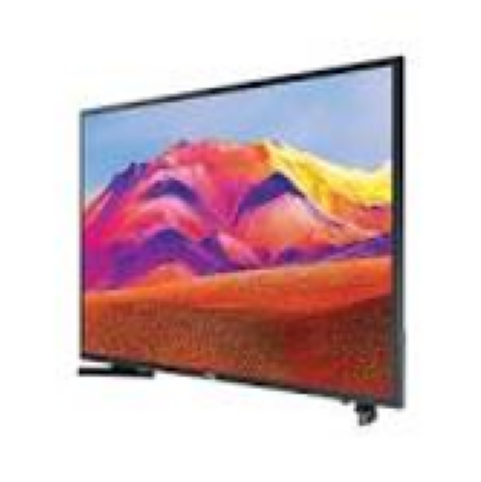

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Imagem com 55.46% de similaridade: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTsdsfVv2GaDh8bJEAAPUtI8dqbuREXke8vXLTqWdw5kFSw2pM3qwkfudmhDA&s


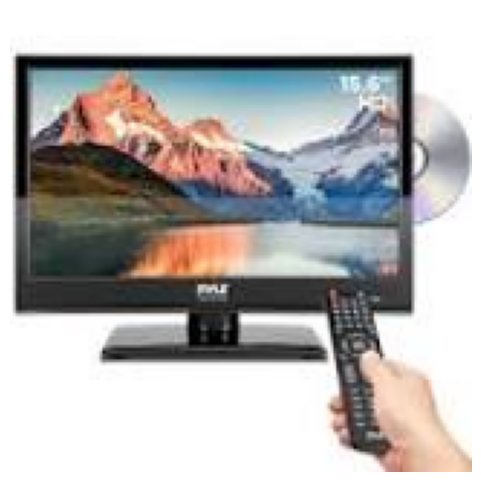

[('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQGnzz_Mh87gpX1Xzyz3DfYHRNF_xq4C2Y8xn13u9QfgjXT6KV8NvkeQOViVdI&s',
  60.092973709106445,
  <PIL.Image.Image image mode=RGB size=160x160>),
 ('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRcaKWUmXFLv4YWPeu3QV-JhHUQGIHkjvj39gyHWdWdbZHPV-rnBx1uw6h4yQ&s',
  61.73747181892395,
  <PIL.Image.Image image mode=RGB size=160x160>),
 ('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQQZ917RfvpWyQzzwKpWrIM1ZrgXdf2CqBqFgrnnkaKesjkE90jBJ8y4prNig&s',
  61.62865161895752,
  <PIL.Image.Image image mode=RGB size=160x160>),
 ('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ9rIQq5SftsxSblulLi8lL8U9MdYBoJnDPHQMCFt5XNSnkiR8F2-KeFyiCRA&s',
  51.50254964828491,
  <PIL.Image.Image image mode=RGB size=160x160>),
 ('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTsdsfVv2GaDh8bJEAAPUtI8dqbuREXke8vXLTqWdw5kFSw2pM3qwkfudmhDA&s',
  55.45738935470581,
  <PIL.Image.Image image mode=RGB size=160x160>)]

In [44]:
image_path = "/content/tv.jpg"
find_similar_images(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

Probabilidades por classe:
 → chair_dataset: 0.00%
 → fridge dataset: 0.00%
 → table dataset: 100.00%
 → tv dataset: 0.00%

Classe predita: table dataset (100.00% de confiança)


Buscando imagens relacionadas a: table...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Imagem com 53.75% de similaridade: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTpZL7iBB9lE4NJdwviWO3Y7yf6oOfQ_MdaObG6eVCB9PNdT12rulh4bzA27w&s


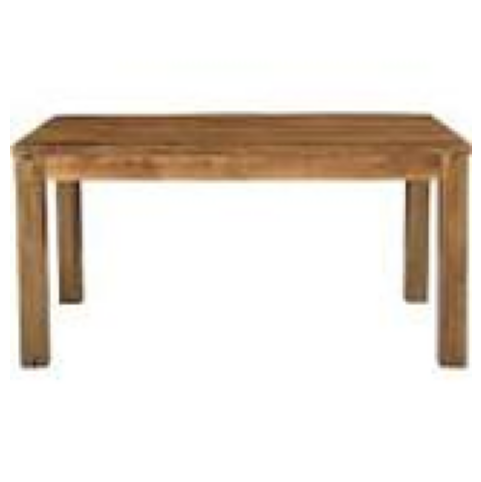

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Imagem com 69.16% de similaridade: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ22r1mEPWnFYhVXNi-cU0WfkPtDRf7p39zXDpXV4jyBgG9j07RY42ZDyURXU8&s


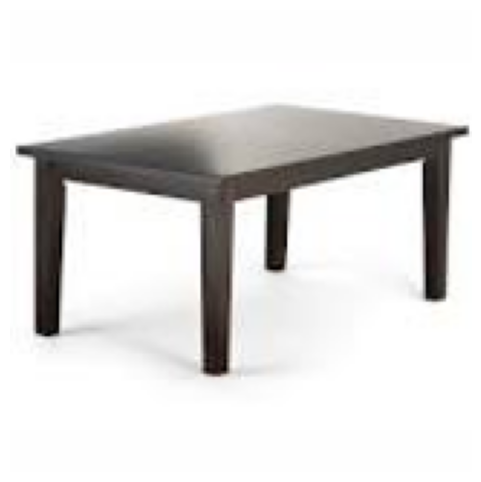

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Imagem com 62.23% de similaridade: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRoxF6nCRHZGVmy42hwRXl1UdqljF_SEA2vyTw2ibfwV6-qnnib9X5bkLizh1I&s


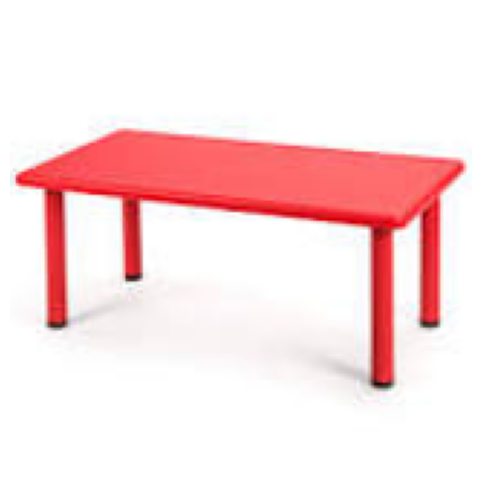

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Imagem com 67.45% de similaridade: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT9kLyy1cpWFfB_FdDq2QmdFP2McHQxxST6t2mFMoW0jbgcEJuJAGAgu_si2A&s


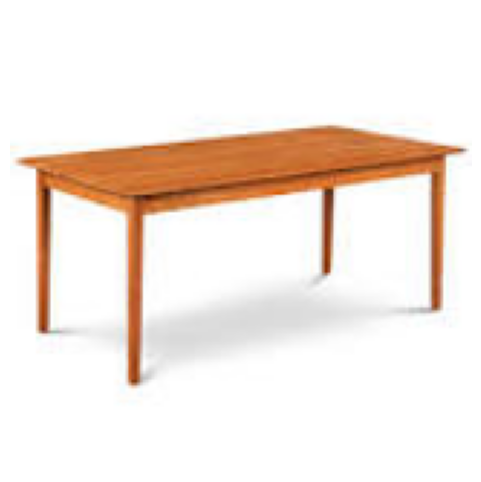

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Imagem com 53.28% de similaridade: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQV9jSjmftPA8dzNNP6_qB4QpS_s3Hy20z6OchKbojtBmcg4PqnkIXiOIp9kQ&s


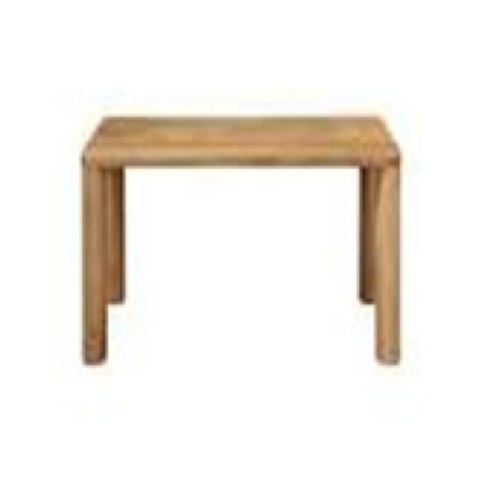

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Imagem com 60.52% de similaridade: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRm4x-jaPy9rvbLeWMbJyES9f7B77FgvnyOUtm8trWbjxTvnzTNBd9Wnq0LAw&s


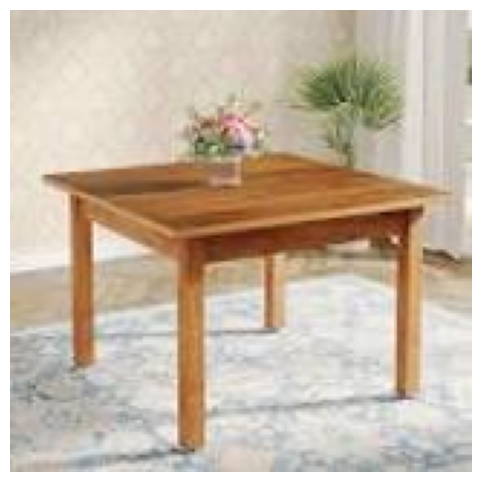

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Imagem com 51.52% de similaridade: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRMPZUzOedkRxjRPbBV_w1fwWbQyhCTryxh0V3IeqPtIP1pXMGLnhsW9ulPnok&s


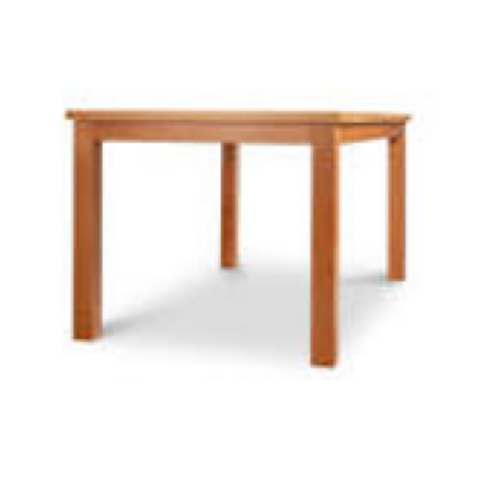

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Imagem com 67.72% de similaridade: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRiqzTnYeazo6YFlwnVGjkcNpVMJmsrJqWh6s97QrTihL00i_jiX6ymSN8WNUc&s


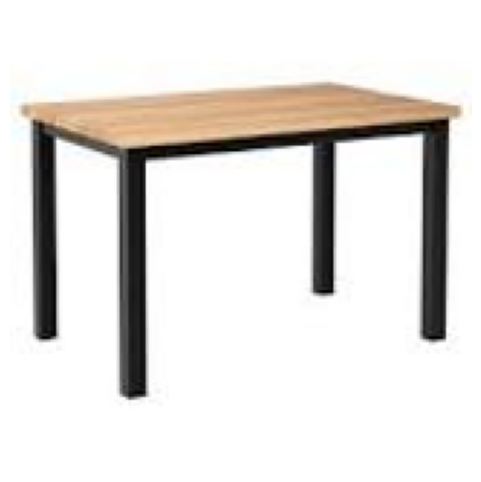

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Imagem com 64.02% de similaridade: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTTX_0mIMDhJ1JpxUDJ68rpvsL1Aji3-lDPAqTvIRdp5zRUr3lNcLUFZdrFqX4&s


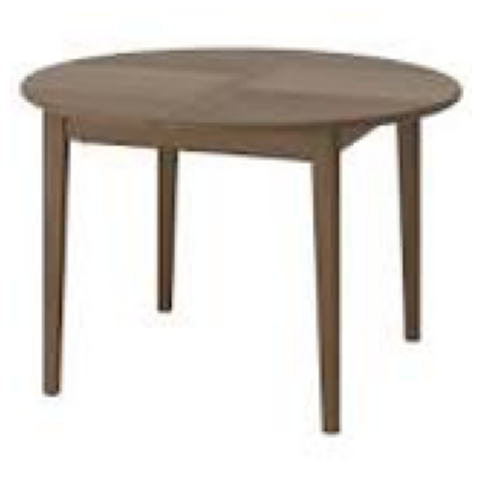

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Imagem com 72.60% de similaridade: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQyVaUcT4diLkpeRkOayAiQSc_qN_VzAUNs72yoZSdg49ZDP3TuZ_OanZgJyg&s


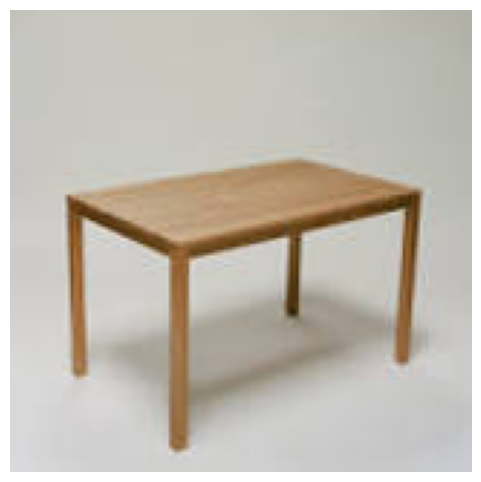

[('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTpZL7iBB9lE4NJdwviWO3Y7yf6oOfQ_MdaObG6eVCB9PNdT12rulh4bzA27w&s',
  53.75065803527832,
  <PIL.Image.Image image mode=RGB size=160x160>),
 ('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ22r1mEPWnFYhVXNi-cU0WfkPtDRf7p39zXDpXV4jyBgG9j07RY42ZDyURXU8&s',
  69.15646195411682,
  <PIL.Image.Image image mode=RGB size=160x160>),
 ('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRoxF6nCRHZGVmy42hwRXl1UdqljF_SEA2vyTw2ibfwV6-qnnib9X5bkLizh1I&s',
  62.23130226135254,
  <PIL.Image.Image image mode=RGB size=160x160>),
 ('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT9kLyy1cpWFfB_FdDq2QmdFP2McHQxxST6t2mFMoW0jbgcEJuJAGAgu_si2A&s',
  67.44586229324341,
  <PIL.Image.Image image mode=RGB size=160x160>),
 ('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQV9jSjmftPA8dzNNP6_qB4QpS_s3Hy20z6OchKbojtBmcg4PqnkIXiOIp9kQ&s',
  53.28094959259033,
  <PIL.Image.Image image mode=RGB size=160x160>),
 ('https://encrypted-tbn0.gstatic

In [45]:
image_path = "/content/mesa2.jpg"
find_similar_images(image_path)